In [1]:
PACKAGE_FOLDER = '/home/joaomarcos/projects/py/geohunter'

import sys
sys.path.append(PACKAGE_FOLDER)
import geohunter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


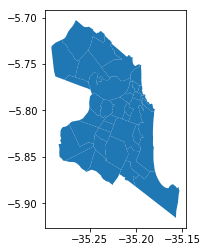

In [2]:
import geopandas as gpd

city_shape = gpd.read_file('bairros_natal.geojson')
city_shape.plot()

In [28]:
landmarks = geohunter.features.Landmarks(city_shape, 
                                         osm_folder='/home/joaomarcos/projects/py/geohunter/examples/natal/')
landmarks.fit(points={
    'amenity':['hospital', 'place_of_worship', 'police', 'school',
               'restaurant'],
    'leisure':['*'],
    'tourism':['*'],
    'shop':['mall', 'supermarket'],
    'highway':['bus_stop'],
    'natural':['sand', 'wood', 'beach']
}, lines={
    'highway':['residential', 'primary']
})

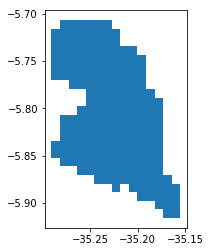

In [29]:
sgrid = geohunter.features.SquareGrid(1).fit(city_shape)
sgrid.data.plot()

In [30]:
pgrid = geohunter.features.Grid(0.5).fit(sgrid.data[['geometry','BAIRRO']])

In [31]:
Xk, kde_params = geohunter.features.KDEFeatures(landmarks, kde_params='auto')\
                        .fit_transform(pgrid.data)

In [32]:
kde_params

{'amenity_hospital': 'auto',
 'amenity_place_of_worship': 'auto',
 'amenity_police': 'auto',
 'amenity_school': 'auto',
 'amenity_restaurant': 'auto',
 'leisure_*': 'auto',
 'tourism_*': 'auto',
 'shop_mall': 'auto',
 'shop_supermarket': 'auto',
 'highway_bus_stop': 'auto',
 'natural_sand': 'auto',
 'natural_wood': 'auto',
 'natural_beach': 'auto',
 'highway_residential': 'auto',
 'highway_primary': 'auto'}

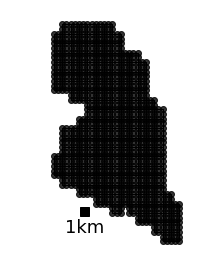

In [7]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fig, ax = plt.subplots(figsize=(3,4))
sgrid.data.plot(ax=ax, color='white', edgecolor='black')
pgrid.data.plot(ax=ax, color='black', alpha=0.8)

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           1/110, '1km', 'lower left', 
                           pad=1,
                           color='black',
                           frameon=False,
                           size_vertical=1/110, fontproperties=fontprops)
ax.add_artist(scalebar)
ax.axis('off')
plt.tight_layout()
# fig.savefig('grids.pdf',dpi=100)

In [33]:
x = Xk.join(pgrid.data[['geometry','BAIRRO']])
x.crs = {'init':'epsg:4326'}
x = gpd.sjoin(x, sgrid.data[['geometry','BAIRRO']]).groupby('index_right').mean()
x.index.name = 'square_place'
Xk = gpd.GeoDataFrame(x.join(sgrid.data))

/home/joaomarcos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [34]:
Xk.head()

,kde:amenity_hospital,kde:amenity_place_of_worship,kde:amenity_police,kde:amenity_school,kde:amenity_restaurant,kde:leisure_*,kde:tourism_*,kde:shop_mall,kde:shop_supermarket,kde:highway_bus_stop,...,kde:natural_wood,kde:natural_beach,kde:highway_residential,kde:highway_primary,geometry,index_right,BAIRRO,REG_ADM,lon,lat
square_place,,,,,,,,,,,,,,,,,,,,,
7,-2.746771,-11.184329,-0.913284,-6.554398,-27.627933,-0.706369,-24.901588,-16.137526,-1.087330,-8.287598,...,-1.843613,-13.436630,3.068656,-28.541477,POLYGON ((-35.29122514945666 -5.85218589623224...,19,Guarapes,Oeste,-35.28668,-5.847640
8,-3.120547,-11.441826,-0.842368,-5.987031,-30.041397,-5.899987,-26.036490,-13.633754,-0.782310,-9.972897,...,-0.512594,-13.471194,2.479325,-34.961172,POLYGON ((-35.29122514945666 -5.84309498714133...,19,Guarapes,Oeste,-35.28668,-5.838550
16,3.738488,-0.398825,-2.326083,2.756781,-24.092500,-0.250049,-17.762182,0.699246,2.662483,1.832925,...,-0.538426,-17.157273,4.137956,-12.419390,POLYGON ((-35.29122514945666 -5.77036771441406...,33,N. S. Apresentação,Norte,-35.28668,-5.765822
17,3.316019,-2.116805,-2.827117,2.104392,-23.807821,0.906427,-17.837502,-0.857433,2.013395,0.022576,...,-2.135820,-16.983376,4.277809,-17.060145,POLYGON ((-35.29122514945666 -5.76127680532315...,33,N. S. Apresentação,Norte,-35.28668,-5.756731
18,2.313187,-4.272245,-3.377860,0.270506,-24.365596,-0.162712,-18.722117,-2.953669,1.143511,-4.311955,...,-2.553629,-16.957652,4.094653,-11.392420,POLYGON ((-35.29122514945666 -5.75218589623224...,33,N. S. Apresentação,Norte,-35.28668,-5.747640


# Baseline

In [35]:
Xb = pd.DataFrame(index=sgrid.data.index, 
        columns=list(landmarks.pdf['tag'].unique())+list(landmarks.ldf['tag'].unique()))
Xb.index.name = 'square_place'
Xb.head()

,amenity_hospital,amenity_place_of_worship,amenity_police,amenity_school,amenity_restaurant,leisure_*,tourism_*,shop_mall,shop_supermarket,highway_bus_stop,natural_sand,natural_wood,natural_beach,highway_residential,highway_primary
square_place,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for ptag in landmarks.pdf['tag'].unique():
    p = landmarks.pdf.loc[landmarks.pdf['tag']==ptag]
    vb = gpd.sjoin(p, sgrid.data[['geometry']]).groupby('index_right').size()
    Xb.loc[vb.index,ptag] = vb
for ltag in landmarks.ldf['tag'].unique():
    l = landmarks.ldf.loc[landmarks.ldf['tag']==ltag]
    vb = gpd.sjoin(l, sgrid.data[['geometry']]).groupby('index_right').size()
    Xb.loc[vb.index,ltag] = vb
Xb = Xb.fillna(0)
Xb = gpd.GeoDataFrame(Xb.join(sgrid.data))

In [37]:
Xb.head()

,amenity_hospital,amenity_place_of_worship,amenity_police,amenity_school,amenity_restaurant,leisure_*,tourism_*,shop_mall,shop_supermarket,highway_bus_stop,...,natural_wood,natural_beach,highway_residential,highway_primary,geometry,index_right,BAIRRO,REG_ADM,lon,lat
index_right,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,104,0,POLYGON ((-35.29122514945666 -5.85218589623224...,19,Guarapes,Oeste,-35.286680,-5.847640
8,0,0,0,0,0,0,0,0,0,0,...,0,0,27,0,POLYGON ((-35.29122514945666 -5.84309498714133...,19,Guarapes,Oeste,-35.286680,-5.838550
29,0,0,0,0,0,0,0,0,0,0,...,0,0,35,0,POLYGON ((-35.28213424036575 -5.86127680532315...,19,Guarapes,Oeste,-35.277589,-5.856731
30,0,0,0,0,0,0,0,0,0,0,...,0,0,74,0,POLYGON ((-35.28213424036575 -5.85218589623224...,19,Guarapes,Oeste,-35.277589,-5.847640
31,0,0,0,0,0,0,0,0,0,0,...,0,0,194,0,POLYGON ((-35.28213424036575 -5.84309498714133...,19,Guarapes,Oeste,-35.277589,-5.838550


# Visualizations

NameError: name 'fm' is not defined

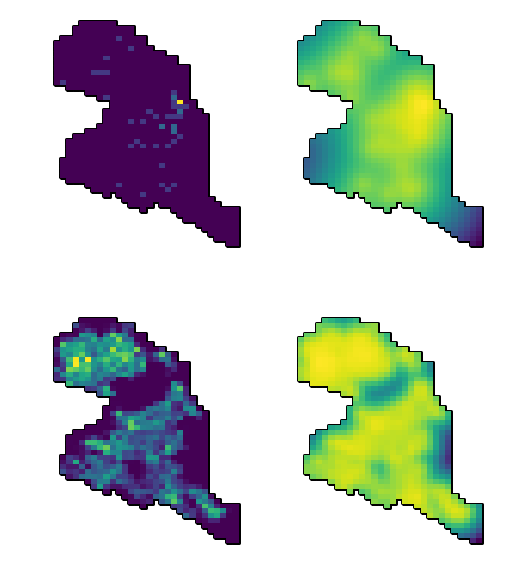

In [19]:
fig, ax = plt.subplots(figsize=(8,10),ncols=2, nrows=2)

for i in range(2):
    for j in range(2):
        sgrid.data.plot(edgecolor='black', color='white', ax=ax[i][j], linewidth=3)   

Xb.plot(column='amenity_hospital',ax=ax[0][0])
Xk.plot(column='kde:amenity_hospital',ax=ax[0][1])

Xb.plot(column='highway_residential',ax=ax[1][0])
Xk.plot(column='kde:highway_residential',ax=ax[1][1])

for i in range(2):
    for j in range(2):
        ax[i][j].axis('off')       
        
fontprops = fm.FontProperties(size=24)
scalebar = AnchoredSizeBar(ax[1][0].transData,
                           1/110, '1km', 'lower left', 
                           pad=1,
                           color='black',
                           frameon=False,
                           size_vertical=1/110, fontproperties=fontprops)
ax[1][0].add_artist(scalebar)
plt.tight_layout()
# plt.savefig('qualitative_500m.pdf',dpi=200)

# Evaluation with metrics

In [38]:
value_cols = list(landmarks.ldf.tag.unique())+list(landmarks.pdf.tag.unique())
q_value_list = []

X = Xb
sz = landmarks.ldf['tag'].value_counts().append(landmarks.pdf['tag'].value_counts())

for cols in value_cols:
    n = sz.loc[cols]
    q = geohunter.metrics.q_ongrid(X[cols], X, 'BAIRRO')
    i = geohunter.metrics.moran_i_ongrid(X[cols],
                                 coords=X['geometry'].centroid.apply(lambda x:x.coords[0]),
                                d_threshold=2/110)
    mean, var = np.mean(X[cols]), np.var(X[cols])
    q_value_list.append([q, i[0], i[1], mean, var, n])
    
results_baseline = pd.DataFrame(q_value_list, columns=['Q_Value', 'Morans I', 'Moran I p', 'Mean', 'Variance', 'N'], index=value_cols)
results_baseline.to_csv('results_baseline_1km_th_2km.csv')

In [39]:
q_value_list = []

X = Xk
value_cols = Xk.columns[:-6]
sz = landmarks.ldf['tag'].value_counts().append(landmarks.pdf['tag'].value_counts())
for cols in value_cols:
    n = sz.loc[cols[4:]]
    q = geohunter.metrics.q_ongrid(X[cols], X, 'BAIRRO')
    i = geohunter.metrics.moran_i_ongrid(X[cols],
                                 coords=X['geometry'].centroid.apply(lambda x:x.coords[0]),
                                d_threshold=1/110)
    mean, var = np.mean(X[cols]), np.var(X[cols])
    q_value_list.append([q, i[0], i[1], mean, var, n])
    
results_kde = pd.DataFrame(q_value_list, columns=['Q_Value', 'Morans I', 'Moran I p', 'Mean', 'Variance', 'N'], 
             index=value_cols)
results_kde.to_csv('results_kde_1km_th_2km.csv')

/usr/local/lib/python3.6/dist-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 4 disconnected observations 
  Island ids: 8, 200, 201, 210
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no nei

In [40]:
results_baseline

,Q_Value,Morans I,Moran I p,Mean,Variance,N
highway_residential,0.356732,0.481766,0.000000e+00,153.018957,19255.307697,39656
highway_primary,0.365752,0.226694,9.072743e-13,14.109005,829.774848,3679
amenity_hospital,0.471855,0.233131,2.096101e-13,0.232227,0.576402,53
amenity_place_of_worship,0.398369,0.230044,4.252154e-13,0.606635,1.546686,139
amenity_police,0.421558,0.137560,1.119162e-05,0.142180,0.159880,32
amenity_school,0.528140,0.352332,0.000000e+00,0.758294,2.382336,173
amenity_restaurant,0.381714,0.267714,0.000000e+00,1.094787,9.877271,234
leisure_*,0.555502,0.505359,0.000000e+00,5.450237,86.095865,1285
tourism_*,0.144048,0.151798,1.350264e-06,0.876777,18.667281,188
shop_mall,0.371797,0.190465,1.684150e-09,0.274882,0.796478,63


In [41]:
results_kde

,Q_Value,Morans I,Moran I p,Mean,Variance,N
kde:amenity_hospital,0.739295,0.909033,0.0,2.668888,5.593889,53
kde:amenity_place_of_worship,0.606596,0.852217,0.0,1.654414,12.315720,139
kde:amenity_police,0.893544,0.986943,0.0,2.465819,7.611267,32
kde:amenity_school,0.587217,0.855445,0.0,2.395657,5.849786,173
kde:amenity_restaurant,0.784713,0.940435,0.0,-5.045956,91.975111,234
kde:leisure_*,0.454322,0.777032,0.0,-0.511768,26.974020,1285
kde:tourism_*,0.781263,0.926602,0.0,-3.177066,66.457892,188
kde:shop_mall,0.717512,0.893753,0.0,-0.833640,26.316708,63
kde:shop_supermarket,0.601781,0.837164,0.0,3.099112,2.813645,53
kde:highway_bus_stop,0.660806,0.881105,0.0,-0.399382,26.041338,396
